# Med Student Qualtrics Results - Usability Questionaire
-----
The clinical questionaire is comprised of 3 tasks (Diabetes, Hypertension, Depression) and 21 questions. There are several ways to begin analyzing the data set:
- Load the data
- [SUS Composite Scoring Difference](#sus)
- [NASA-TLX Composite Scoring Difference](#nasa)
- [User Satisfaction](#user)
- [Individual-Question Comparisons](#iqc)

## Load the data
----------
In this step we will load three files: (1) Control Survey, (2) Intervention Survey, (3) Survey (both) metadata

In [2]:
%matplotlib inline
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
import scipy.stats
import numpy as np

#Here are the SUS questions on our input data set
sus_qs = ['Ease of Use (SUS)-I think that I would like to use this application frequently.',
       'Ease of Use (SUS)-I found the application unnecessarily complex.',
       'Ease of Use (SUS)-I thought the application was easy to use.',
       'Ease of Use (SUS)-I think that I would need the support of a technical person to be able to use this application.',
       'Ease of Use (SUS)-I found the various functions in the application were well integrated.',
       'Ease of Use (SUS)-I thought there was too much inconsistency in this application.',
       'Ease of Use (SUS)-I would imagine that most people would learn to use this application very quickly.',
       'Ease of Use (SUS)-I found the application very cumbersome to use.',
       'Ease of Use (SUS)-I felt very confident using the application.',
       'Ease of Use (SUS)-I needed to learn a lot of things before I could get going with this application.']
nasa_qs = ['Cognitive Workload (NASA-TLX)-How mentally demanding was the task?',
           'Cognitive Workload (NASA-TLX)-How much time pressure did you feel?',
           'Cognitive Workload (NASA-TLX)-How hard did you have to work to accomplish your level of performance?',
           'Cognitive Workload (NASA-TLX)-How insecure, discouraged, irritated, stressed, and annoyed were you?',
           'Cognitive Workload (NASA-TLX)-How successful were you in accomplishing what you were asked to do?']
user_qs = ['User Satisfaction-I believe this medication display would help improve my ability to manage patients’  medications.',
             'User Satisfaction-I believe this medication display would aid me in providing a better treatment regimen for my patients.',
             'User Satisfaction-I believe this medication display would improve patient outcomes.']
             

us_control = pd.read_csv(header=1,filepath_or_buffer=open("./med_student_materials/qualtrics_data/KaiRx_Usability_Survey_and_Feedback__Control.csv","rb"))
us_control_user = us_control[user_qs]
us_control_user = us_control_user.dropna()
us_control_sus = us_control[sus_qs]
us_control_sus = us_control_sus.dropna()
us_control_nasa = us_control[nasa_qs]
us_control_nasa = us_control_nasa.dropna()
us_interve = pd.read_csv(header=1,filepath_or_buffer=open("./med_student_materials/qualtrics_data/KaiRx_Usability_Survey_and_Feedback__Intervention.csv","rb"))
us_interve_sus = us_interve[sus_qs]
us_interve_sus = us_interve_sus.dropna()
us_interve_user = us_interve[user_qs]
us_interve_user = us_interve_user.dropna()
us_interve_nasa = us_interve[nasa_qs]
us_interve_nasa = us_interve_nasa.dropna()
us_interve['label'] = "intervention"
us_control['label'] = "control"
dd = json.load(open("./med_student_materials/qualtrics_data/KaiRx_Usability_Survey_and_Feedback_-_Control.qsf","r"))

colors = ['b','r','c','m','y','k']
print("Control survey data shape: " + str(us_control.shape))
print("Control survey drop missing data shape: " + str(us_control_sus.shape))
print("Intervention survey data shape: " + str(us_interve.shape))
print("Intervention survey drop missing data shape: " + str(us_interve_sus.shape))

Control survey data shape: (65, 35)
Control survey drop missing data shape: (64, 10)
Intervention survey data shape: (68, 35)
Intervention survey drop missing data shape: (68, 10)


<a id='sus'></a>
### SUS Composite Scoring Difference
------
SUS stands for system usability score. Using this [site](http://www.measuringu.com/sus.php) as a reference, we implement the SUS score for each individual and then look at a histogram of the SUS scores to determine an appropriate method for inference.

**One thing to consider, this analysis requires listwise deletion (delete an entire participants survey if 1 answer is missing). We only had to do this for 1 survey, but want to be transparent.**


In [55]:
#Implement the SUS algorithm on the listwise-deleted data (see above load data section)
#calculating the SUS score
def scoreResult(x):
    if x=='Strongly disagree':
        return(1)
    elif x=='Somewhat disagree':
        return(2)
    elif x=='Neither agree nor disagree':
        return(3)
    elif x=='Somewhat agree':
        return(4)
    elif x=='Strongly agree':
        return(5)       
def even_correct(x):
    return(5-x)
def odd_correct(x):
    return(x-1)
def susIt(x):
    temp = [scoreResult(y) for y in x]
    temp_correct = [even_correct(y) if (y % 2 ==0) else odd_correct(y) for y in temp]
    result = np.sum(temp_correct)*2.5
    return(result)
 
sus_control = pd.Series(us_control_sus.apply(susIt,axis=1))
sus_interve = pd.Series(us_interve_sus.apply(susIt,axis=1))

print("SUS 5 point summary in control group is: ")
print("**********************************************")
print(sus_control.describe())
print("\n")
print("SUS 5 point summary in intervention group is: ")
print("**********************************************")
print(sus_interve.describe())

SUS 5 point summary in control group is: 
**********************************************
count     64.000000
mean      43.906250
std       12.715406
min        0.000000
25%       37.500000
50%       42.500000
75%       50.000000
max      100.000000
dtype: float64


SUS 5 point summary in intervention group is: 
**********************************************
count     68.000000
mean      49.080882
std       13.072019
min       25.000000
25%       42.500000
50%       50.000000
75%       55.000000
max      100.000000
dtype: float64


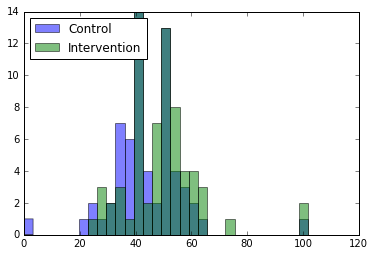

In [60]:
x = sus_control
y = sus_interve

bins = np.linspace(0, 105, 33)

plt.hist(x, bins, alpha=0.5, label='Control')
plt.hist(y, bins, alpha=0.5, label='Intervention')
plt.legend(loc='upper left')
plt.show()

##### Visual Results
>This initial histogram seems to indicate that the intervention group has a slightly higher (yay!) mean than the control group. Let's officially test this hypothesis that the two groups have the same mean and see if we find evidence of a difference

In [65]:
import scipy.stats
print("Levene's test restuls: \n*************************************************")
print(scipy.stats.levene(x,y))
print("\n")
print("Shapiro-Wilk results for the control group: \n*************************************************")
print(scipy.stats.shapiro(x))
print("\n")
print("Shapiro-Wilk results for the intervention group: \n*************************************************")
print(scipy.stats.shapiro(y))
print("\n")
print("Student's t-test restuls: \n*************************************************")
print(scipy.stats.ttest_ind(x,y))

Levene's test restuls: 
*************************************************
LeveneResult(statistic=0.00049278227954923574, pvalue=0.98232349146767795)


Shapiro-Wilk results for the control group: 
*************************************************
(0.8876551389694214, 2.8271613700781018e-05)


Shapiro-Wilk results for the intervention group: 
*************************************************
(0.8708099722862244, 4.285194336262066e-06)


Student's t-test restuls: 
*************************************************
Ttest_indResult(statistic=-2.3032060180784777, pvalue=0.0228550294862267)


##### Stats Results
> While our two samples don't appear to be normally distributed (Shapiro-Wilks test), assumption of equal variances is met. We also know Student's T is somewhat robust against the assumption of normailty, so we proceed anyway. We find a signficant difference between the control and intervention groups with the intervention group having a higher SUS score.

<a id='nasa'></a>
### NASA-TLX Composite Scoring Difference
-------
*Note: Based on previous email, still waiting to hear how you want to do this, but taking a stab here. I've never implemented this, so please double check my logic.*

Here is the implementation:

In [5]:
#Calculating the NASA-TLX
def vh(x):
    if x=='Very low':
        return(1*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Somewhat low':
        return(2*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Neutral':
        return(3*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Somewhat high':
        return(4*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Very high':
        return(5*4) #Note this is 1*4 - I'm equally weighting all questions by 4
def vl(x):
    if x=='Very low':
        return(5*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Somewhat low':
        return(4*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Neutral':
        return(3*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Somewhat high':
        return(2*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Very high':
        return(1*4) #Note this is 1*4 - I'm equally weighting all questions by 4
 
nasa_control = us_control_nasa.apply(lambda row: np.sum([vl(row['Cognitive Workload (NASA-TLX)-How mentally demanding was the task?']),
                                          vl(row['Cognitive Workload (NASA-TLX)-How much time pressure did you feel?']),
                                          vl(row['Cognitive Workload (NASA-TLX)-How hard did you have to work to accomplish your level of performance?']),
                                          vl(row['Cognitive Workload (NASA-TLX)-How insecure, discouraged, irritated, stressed, and annoyed were you?']),
                                          vh(row['Cognitive Workload (NASA-TLX)-How successful were you in accomplishing what you were asked to do?'])
                                          ]),
                                     axis=1)

nasa_interve = us_interve_nasa.apply(lambda row: np.sum([vl(row['Cognitive Workload (NASA-TLX)-How mentally demanding was the task?']),
                                          vl(row['Cognitive Workload (NASA-TLX)-How much time pressure did you feel?']),
                                          vl(row['Cognitive Workload (NASA-TLX)-How hard did you have to work to accomplish your level of performance?']),
                                          vl(row['Cognitive Workload (NASA-TLX)-How insecure, discouraged, irritated, stressed, and annoyed were you?']),
                                          vh(row['Cognitive Workload (NASA-TLX)-How successful were you in accomplishing what you were asked to do?'])
                                          ]),
                                     axis=1)

print("NASA 5 point summary in control group is: ")
print("**********************************************")
print(nasa_control.describe())
print("\n")
print("NASA 5 point summary in intervention group is: ")
print("**********************************************")
print(nasa_interve.describe())

NASA 5 point summary in control group is: 
**********************************************
count    64.000000
mean     72.437500
std      14.397834
min      36.000000
25%      63.000000
50%      72.000000
75%      84.000000
max      96.000000
dtype: float64


NASA 5 point summary in intervention group is: 
**********************************************
count     68.000000
mean      76.176471
std       14.941619
min       36.000000
25%       64.000000
50%       76.000000
75%       88.000000
max      100.000000
dtype: float64


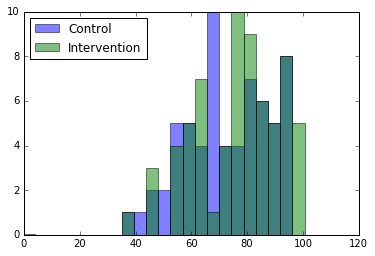

In [9]:
x = nasa_control
y = nasa_interve

bins = np.linspace(0, 105, 25)

plt.hist(x, bins, alpha=0.5, label='Control')
plt.hist(y, bins, alpha=0.5, label='Intervention')
plt.legend(loc='upper left')
plt.show()

##### Visual Results
>It appears (at least visually) that the control group seems to have a higher trending average NASA score than the intervention group; however, let's rigorously test this hypothesis of equal average NASA scores:
$$H_{0}:\hat{\mu}_{control}=\hat{\mu}_{intervention}$$

In [7]:
print("Levene's test restuls: \n*************************************************")
print(scipy.stats.levene(x,y))
print("\n")
print("Shapiro-Wilk results for the control group: \n*************************************************")
print(scipy.stats.shapiro(x))
print("\n")
print("Shapiro-Wilk results for the intervention group: \n*************************************************")
print(scipy.stats.shapiro(y))
print("\n")
print("Student's t-test restuls: \n*************************************************")
print(scipy.stats.ttest_ind(x,y))

Levene's test restuls: 
*************************************************
LeveneResult(statistic=0.0059191028775898253, pvalue=0.93879297440910514)


Shapiro-Wilk results for the control group: 
*************************************************
(0.9697995185852051, 0.11809536814689636)


Shapiro-Wilk results for the intervention group: 
*************************************************
(0.9672764539718628, 0.07089155167341232)


Student's t-test restuls: 
*************************************************
Ttest_indResult(statistic=-1.4623976708529465, pvalue=0.14604559653555182)


##### Statistics Results
>A p-value less than >0.05 (i.e. 0.14) indicates that we don't have enough evidence to reject the null hypothesis and **can't** conclude that the two have different average NASA scores (intervention lower than control). **This could be a power issue. Would a mean difference of ~ 3 points on the NASA scale mean something to someone that understood this instrument?**

<a id='user'></a>
### User Satisfaction
-------
These are the last three questions from the usability questionairre. We will score and compare.

In [5]:
def vh_user(x):
    if x=='Strongly disagree':
        return(1) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Somewhat disagree':
        return(2) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Neither agree nor disagree':
        return(3) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Somewhat agree':
        return(4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Strongly agree':
        return(5) #Note this is 1*4 - I'm equally weighting all questions by 4

user_control = us_control_user.apply(lambda row: np.sum([vh_user(row['User Satisfaction-I believe this medication display would help improve my ability to manage patients’  medications.']),
                                          vh_user(row['User Satisfaction-I believe this medication display would aid me in providing a better treatment regimen for my patients.']),
                                          vh_user(row['User Satisfaction-I believe this medication display would improve patient outcomes.'])
                                          ]),
                                     axis=1)
user_interve = us_interve_user.apply(lambda row: np.sum([vh_user(row['User Satisfaction-I believe this medication display would help improve my ability to manage patients’  medications.']),
                                          vh_user(row['User Satisfaction-I believe this medication display would aid me in providing a better treatment regimen for my patients.']),
                                          vh_user(row['User Satisfaction-I believe this medication display would improve patient outcomes.'])
                                          ]),
                                     axis=1)
print('User Satisfaction Control - Descriptive Stats: ')
print(user_control.describe())
print('User Satisfaction Intervention - Descriptive Stats: ')
print(user_interve.describe())

User Satisfaction Control - Descriptive Stats: 
count    64.000000
mean     10.734375
std       3.128173
min       3.000000
25%       9.000000
50%      11.000000
75%      12.000000
max      15.000000
dtype: float64
User Satisfaction Intervention - Descriptive Stats: 
count    68.000000
mean     12.279412
std       2.245032
min       6.000000
25%      11.000000
50%      12.000000
75%      15.000000
max      15.000000
dtype: float64


#### Inference
-----
Based on an independent t-test.

In [6]:
print("Student's t-test restuls: \n*************************************************")
print(scipy.stats.ttest_ind(user_control,user_interve))

Student's t-test restuls: 
*************************************************
Ttest_indResult(statistic=-3.2745666143264596, pvalue=0.0013563814374969866)


>#### Results
Because the p-value is less than 0.05 (i.e. 0.0014) we can claim that we have enough evidence to reject the null hypothesis, indicating the averages are different for the two arms of the study

<a id='iqc'></a>
### Individual-Question Comparisons
--------
There are 3 tasks (Ease of Use, Cognitive Workload, and User Satisfaction) and 18 questions:

- Ease of Use
    - [I think that I would like to use this application frequently.](#e1)
    - [I found the application unnecessarily complex.](#e2)
    - [I thought the application was easy to use.](#e3)
    - [I think that I would need the support of a technical person](#e4)
    - [I found the various functions in the application were well integrated.](#e5)
    - [I thought there was too much inconsistency in this application.](#e6)
    - [I would imagine that most people would learn to use this application very quickly.](#e7)
    - [I found the application very cumbersome to use.](#e8)
    - [I felt very confident using the application.](#e9)
    - [I needed to learn a lot of things before I could get going with this application.](#e10)
- Cognitive Workload
    - [How mentally demanding was the task?](#c1)
    - [How much time pressure did you feel?](#c2)
    - [How successful were you in accomplishing what you were asked to do?](#c3)
    - [How hard did you have to work to accomplish your level of performance?](#c4)
    - [How insecure, discouraged, irritated, stressed, and annoyed were you?](#c5)
- Satisfaction
    - [I believe this medication display would help improve my ability](#s1)
    - [I believe this medication display would aid me in providing a better treatment](#s2)
    - [I believe this medication display would improve patient outcomes.](#s3)

### Ease of Use
---------

<a id='e1'></a>
### I think that I would like to use this application frequently.

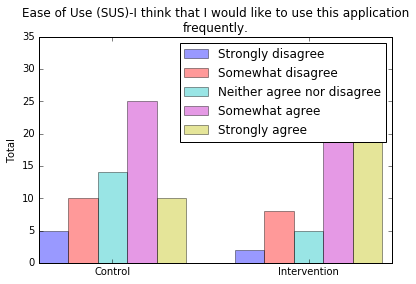

In [33]:
from utils import createBarPlot
question_choi = [['Strongly disagree','Somewhat disagree','Neither agree nor disagree','Somewhat agree','Strongly agree'],
                ['Neutral','Somewhat low','Somewhat high','Very low','Very high']]
questionsName = 'Ease of Use (SUS)-I think that I would like to use this application frequently.'
dd_number = 0
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [3]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(9.8248890223289145, 0.043483003455806142, 4, array([[  9.21212121,   9.78787879],
       [ 28.60606061,  30.39393939],
       [  8.72727273,   9.27272727],
       [ 14.06060606,  14.93939394],
       [  3.39393939,   3.60606061]]))
Arm                                                 control  intervention
Ease of Use (SUS)-I think that I would like to ...                       
Neither agree nor disagree                               14             5
Somewhat agree                                           25            34
Somewhat disagree                                        10             8
Strongly agree                                           10            19
Strongly disagree                                         5             2


<a id='e2'></a>
### I found the application unnecessarily complex.

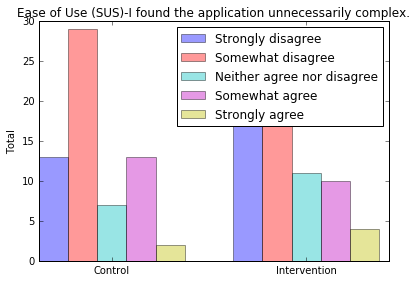

In [4]:
questionsName = 'Ease of Use (SUS)-I found the application unnecessarily complex.'
dd_number = 0
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [5]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(2.5249360613810725, 0.64017624080483082, 4, array([[  8.72727273,   9.27272727],
       [ 11.15151515,  11.84848485],
       [ 26.66666667,  28.33333333],
       [  2.90909091,   3.09090909],
       [ 14.54545455,  15.45454545]]))
Arm                                                 control  intervention
Ease of Use (SUS)-I found the application unnec...                       
Neither agree nor disagree                                7            11
Somewhat agree                                           13            10
Somewhat disagree                                        29            26
Strongly agree                                            2             4
Strongly disagree                                        13            17


<a id='e3'></a>
### I thought the application was easy to use.

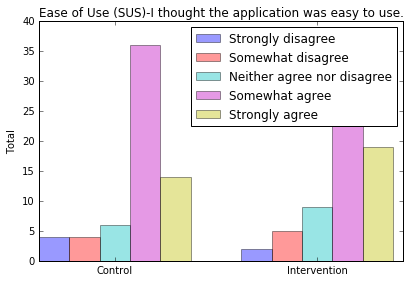

In [6]:
questionsName = 'Ease of Use (SUS)-I thought the application was easy to use.'
dd_number = 0
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [7]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(2.146547314578005, 0.70882626678100369, 4, array([[  7.27272727,   7.72727273],
       [ 33.45454545,  35.54545455],
       [  4.36363636,   4.63636364],
       [ 16.        ,  17.        ],
       [  2.90909091,   3.09090909]]))
Arm                                                 control  intervention
Ease of Use (SUS)-I thought the application was...                       
Neither agree nor disagree                                6             9
Somewhat agree                                           36            33
Somewhat disagree                                         4             5
Strongly agree                                           14            19
Strongly disagree                                         4             2


<a id='e4'></a>
### I think that I would need the support of a technical person

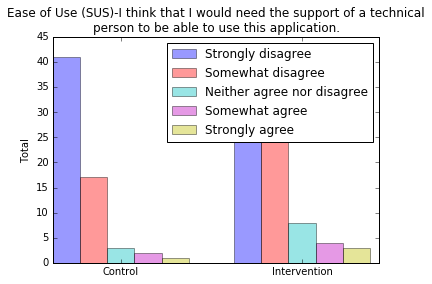

In [8]:
questionsName = 'Ease of Use (SUS)-I think that I would need the support of a technical person to be able to use this application.'
dd_number = 0
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [9]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(7.7984277950310563, 0.099247441870898012, 4, array([[  5.33333333,   5.66666667],
       [  2.90909091,   3.09090909],
       [ 20.36363636,  21.63636364],
       [  1.93939394,   2.06060606],
       [ 33.45454545,  35.54545455]]))
Arm                                                 control  intervention
Ease of Use (SUS)-I think that I would need the...                       
Neither agree nor disagree                                3             8
Somewhat agree                                            2             4
Somewhat disagree                                        17            25
Strongly agree                                            1             3
Strongly disagree                                        41            28


<a id='e5'></a>
### I found the various functions in the application were well integrated.

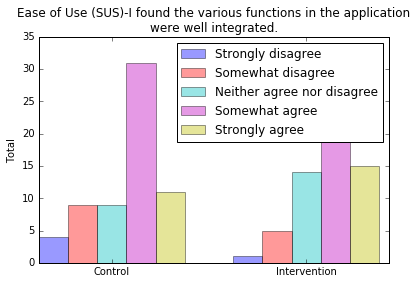

In [10]:
questionsName = 'Ease of Use (SUS)-I found the various functions in the application were well integrated.'
dd_number = 0
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [11]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(4.5907016791352833, 0.33192766811252877, 4, array([[ 11.15151515,  11.84848485],
       [ 31.03030303,  32.96969697],
       [  6.78787879,   7.21212121],
       [ 12.60606061,  13.39393939],
       [  2.42424242,   2.57575758]]))
Arm                                                 control  intervention
Ease of Use (SUS)-I found the various functions...                       
Neither agree nor disagree                                9            14
Somewhat agree                                           31            33
Somewhat disagree                                         9             5
Strongly agree                                           11            15
Strongly disagree                                         4             1


<a id='e6'></a>
### I thought there was too much inconsistency in this application.

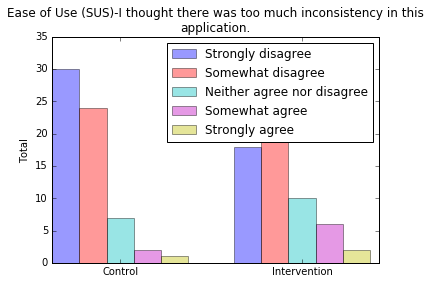

In [12]:
questionsName = 'Ease of Use (SUS)-I thought there was too much inconsistency in this application.'
dd_number = 0
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [13]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(6.8907176841324764, 0.14177723128625541, 4, array([[  8.24242424,   8.75757576],
       [  3.87878788,   4.12121212],
       [ 27.15151515,  28.84848485],
       [  1.45454545,   1.54545455],
       [ 23.27272727,  24.72727273]]))
Arm                                                 control  intervention
Ease of Use (SUS)-I thought there was too much ...                       
Neither agree nor disagree                                7            10
Somewhat agree                                            2             6
Somewhat disagree                                        24            32
Strongly agree                                            1             2
Strongly disagree                                        30            18


<a id='e7'></a>
### I would imagine that most people would learn to use this application very quickly.

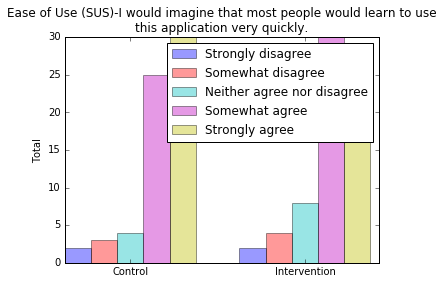

In [14]:
questionsName = 'Ease of Use (SUS)-I would imagine that most people would learn to use this application very quickly.'
dd_number = 0
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [15]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(2.4784663865546217, 0.64849582677268791, 4, array([[  5.81818182,   6.18181818],
       [ 26.66666667,  28.33333333],
       [  3.39393939,   3.60606061],
       [ 26.18181818,  27.81818182],
       [  1.93939394,   2.06060606]]))
Arm                                                 control  intervention
Ease of Use (SUS)-I would imagine that most peo...                       
Neither agree nor disagree                                4             8
Somewhat agree                                           25            30
Somewhat disagree                                         3             4
Strongly agree                                           30            24
Strongly disagree                                         2             2


<a id='e8'></a>
### I found the application very cumbersome to use.

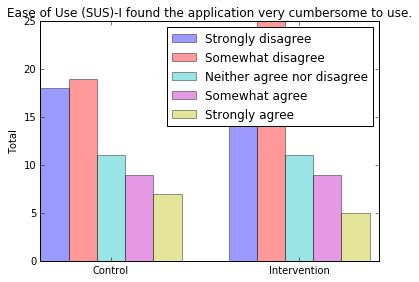

In [16]:
questionsName = 'Ease of Use (SUS)-I found the application very cumbersome to use.'
dd_number = 0
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [17]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(1.0312499999999998, 0.9050210237796541, 4, array([[ 10.66666667,  11.33333333],
       [  8.72727273,   9.27272727],
       [ 21.33333333,  22.66666667],
       [  5.81818182,   6.18181818],
       [ 17.45454545,  18.54545455]]))
Arm                                                 control  intervention
Ease of Use (SUS)-I found the application very ...                       
Neither agree nor disagree                               11            11
Somewhat agree                                            9             9
Somewhat disagree                                        19            25
Strongly agree                                            7             5
Strongly disagree                                        18            18


<a id='e9'></a>
### I felt very confident using the application.

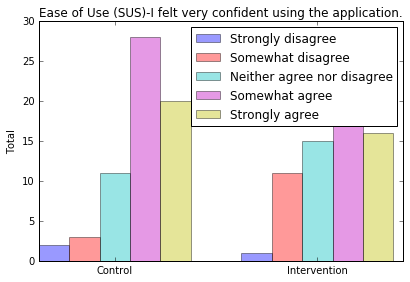

In [18]:
questionsName = 'Ease of Use (SUS)-I felt very confident using the application.'
dd_number = 0
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [19]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(6.0187169933285372, 0.1977548307547109, 4, array([[ 12.60606061,  13.39393939],
       [ 25.6969697 ,  27.3030303 ],
       [  6.78787879,   7.21212121],
       [ 17.45454545,  18.54545455],
       [  1.45454545,   1.54545455]]))
Arm                                                 control  intervention
Ease of Use (SUS)-I felt very confident using t...                       
Neither agree nor disagree                               11            15
Somewhat agree                                           28            25
Somewhat disagree                                         3            11
Strongly agree                                           20            16
Strongly disagree                                         2             1


<a id='e10'></a>
### I needed to learn a lot of things before I could get going with this application.

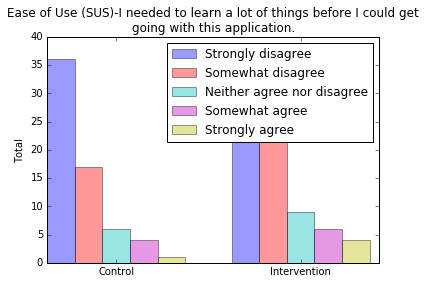

In [20]:
questionsName = 'Ease of Use (SUS)-I needed to learn a lot of things before I could get going with this application.'
dd_number = 0
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [21]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(7.4337417978622273, 0.11466674073633329, 4, array([[  7.27272727,   7.72727273],
       [  4.84848485,   5.15151515],
       [ 20.84848485,  22.15151515],
       [  2.42424242,   2.57575758],
       [ 28.60606061,  30.39393939]]))
Arm                                                 control  intervention
Ease of Use (SUS)-I needed to learn a lot of th...                       
Neither agree nor disagree                                6             9
Somewhat agree                                            4             6
Somewhat disagree                                        17            26
Strongly agree                                            1             4
Strongly disagree                                        36            23


### Congnitive Workload
--------

<a id='c1'></a>
### How mentally demanding was the task?

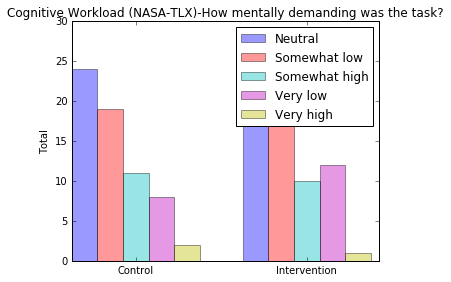

In [34]:
questionsName = 'Cognitive Workload (NASA-TLX)-How mentally demanding was the task?'
dd_number = 1
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [23]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(2.7325337111588821, 0.6035337545245576, 4, array([[ 20.84848485,  22.15151515],
       [ 10.18181818,  10.81818182],
       [ 21.81818182,  23.18181818],
       [  1.45454545,   1.54545455],
       [  9.6969697 ,  10.3030303 ]]))
Arm                                                 control  intervention
Cognitive Workload (NASA-TLX)-How mentally dema...                       
Neutral                                                  24            19
Somewhat high                                            11            10
Somewhat low                                             19            26
Very high                                                 2             1
Very low                                                  8            12


<a id='c2'></a>
### How much time pressure did you feel?

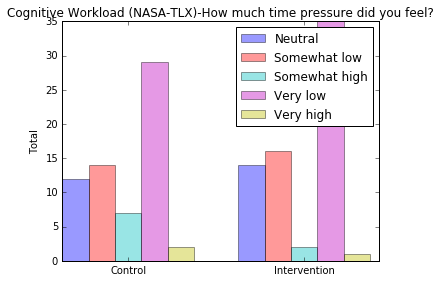

In [36]:
questionsName = 'Cognitive Workload (NASA-TLX)-How much time pressure did you feel?'
dd_number = 1
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [25]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(3.8431075014140275, 0.42765513414723644, 4, array([[ 12.60606061,  13.39393939],
       [  4.36363636,   4.63636364],
       [ 14.54545455,  15.45454545],
       [  1.45454545,   1.54545455],
       [ 31.03030303,  32.96969697]]))
Arm                                                 control  intervention
Cognitive Workload (NASA-TLX)-How much time pre...                       
Neutral                                                  12            14
Somewhat high                                             7             2
Somewhat low                                             14            16
Very high                                                 2             1
Very low                                                 29            35


<a id='c3'></a>
### How successful were you in accomplishing what you were asked to do?

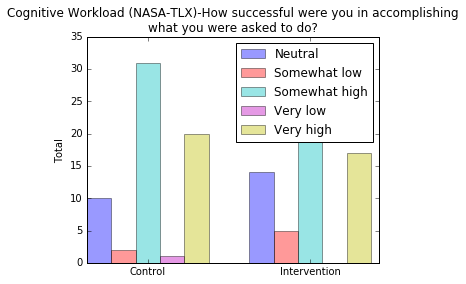

In [37]:
questionsName = 'Cognitive Workload (NASA-TLX)-How successful were you in accomplishing what you were asked to do?'
dd_number = 1
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [27]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(3.093125425846015, 0.54236383591397219, 4, array([[ 11.63636364,  12.36363636],
       [ 30.54545455,  32.45454545],
       [  3.39393939,   3.60606061],
       [ 17.93939394,  19.06060606],
       [  0.48484848,   0.51515152]]))
Arm                                                 control  intervention
Cognitive Workload (NASA-TLX)-How successful we...                       
Neutral                                                  10            14
Somewhat high                                            31            32
Somewhat low                                              2             5
Very high                                                20            17
Very low                                                  1             0


<a id='c4'></a>
### How hard did you have to work to accomplish your level of performance?

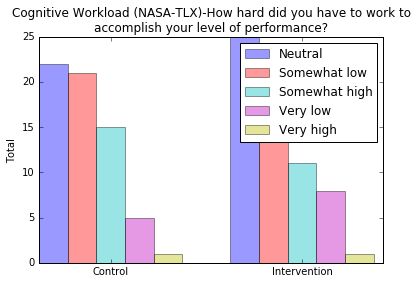

In [38]:
questionsName = 'Cognitive Workload (NASA-TLX)-How hard did you have to work to accomplish your level of performance?'
dd_number = 1
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [29]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(1.4702287113699819, 0.83190166737195281, 4, array([[ 22.78787879,  24.21212121],
       [ 12.60606061,  13.39393939],
       [ 21.33333333,  22.66666667],
       [  0.96969697,   1.03030303],
       [  6.3030303 ,   6.6969697 ]]))
Arm                                                 control  intervention
Cognitive Workload (NASA-TLX)-How hard did you ...                       
Neutral                                                  22            25
Somewhat high                                            15            11
Somewhat low                                             21            23
Very high                                                 1             1
Very low                                                  5             8


<a id='c5'></a>
### How insecure, discouraged, irritated, stressed, and annoyed were you?

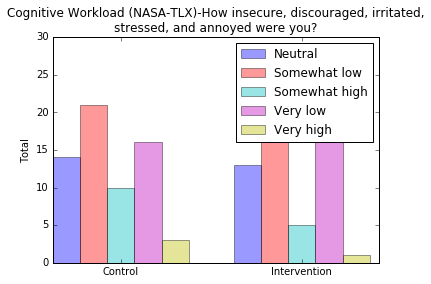

In [39]:
questionsName = 'Cognitive Workload (NASA-TLX)-How insecure, discouraged, irritated, stressed, and annoyed were you?'
dd_number = 1
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [31]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(5.058998599439775, 0.28129726668083488, 4, array([[ 13.09090909,  13.90909091],
       [  7.27272727,   7.72727273],
       [ 21.33333333,  22.66666667],
       [  1.93939394,   2.06060606],
       [ 20.36363636,  21.63636364]]))
Arm                                                 control  intervention
Cognitive Workload (NASA-TLX)-How insecure, dis...                       
Neutral                                                  14            13
Somewhat high                                            10             5
Somewhat low                                             21            23
Very high                                                 3             1
Very low                                                 16            26


### Satisfaction
----------

<a id='s1'></a>
### I believe this medication display would help improve my ability

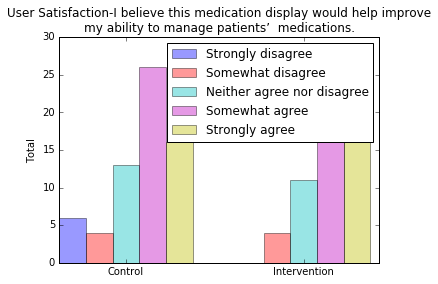

In [40]:
questionsName = 'User Satisfaction-I believe this medication display would help improve my ability to manage patients’  medications.'
dd_number = 0
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [41]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(7.8666363293569166, 0.096587461211807446, 4, array([[ 11.72932331,  12.27067669],
       [ 26.87969925,  28.12030075],
       [  3.90977444,   4.09022556],
       [ 19.54887218,  20.45112782],
       [  2.93233083,   3.06766917]]))
Arm                                                 control  intervention
User Satisfaction-I believe this medication dis...                       
Neither agree nor disagree                               13            11
Somewhat agree                                           26            29
Somewhat disagree                                         4             4
Strongly agree                                           16            24
Strongly disagree                                         6             0


<a id='s2'></a>
### I believe this medication display would aid me in providing a better treatment

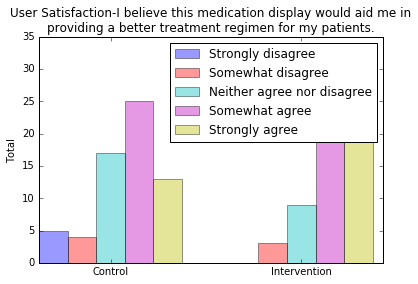

In [42]:
questionsName = 'User Satisfaction-I believe this medication display would aid me in providing a better treatment regimen for my patients.'
dd_number = 0
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [43]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(11.374854766177027, 0.022659000576757345, 4, array([[ 12.60606061,  13.39393939],
       [ 28.12121212,  29.87878788],
       [  3.39393939,   3.60606061],
       [ 17.45454545,  18.54545455],
       [  2.42424242,   2.57575758]]))
Arm                                                 control  intervention
User Satisfaction-I believe this medication dis...                       
Neither agree nor disagree                               17             9
Somewhat agree                                           25            33
Somewhat disagree                                         4             3
Strongly agree                                           13            23
Strongly disagree                                         5             0


<a id='s3'></a>
### I believe this medication display would improve patient outcomes.

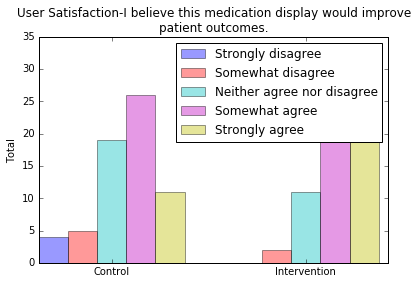

In [44]:
questionsName = 'User Satisfaction-I believe this medication display would improve patient outcomes.'
dd_number = 0
createBarPlot(questionsName,dd_number,question_choi,us_control,us_interve)

In [45]:
cont_table = pd.concat([us_interve[['label',questionsName]],us_control[['label',questionsName]]],
                       axis=0)
crosstab = pd.crosstab(cont_table[questionsName], cont_table['label'], 
            rownames=[questionsName], colnames=['Arm'])
print(scipy.stats.chi2_contingency(crosstab))
print(crosstab)

(11.548921097285067, 0.021040611899419033, 4, array([[ 14.66165414,  15.33834586],
       [ 29.32330827,  30.67669173],
       [  3.42105263,   3.57894737],
       [ 15.63909774,  16.36090226],
       [  1.95488722,   2.04511278]]))
Arm                                                 control  intervention
User Satisfaction-I believe this medication dis...                       
Neither agree nor disagree                               19            11
Somewhat agree                                           26            34
Somewhat disagree                                         5             2
Strongly agree                                           11            21
Strongly disagree                                         4             0


[Main Menu](main_med_student.ipynb)